# 201902-Fordgobike-Tripdata
## by Abdelrahman Shalaby

## Preliminary Wrangling

Dataset consists of 183412 observations for each observation contains 16 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# read data
df = pd.read_csv("201902-fordgobike-tripdata.csv")
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# check null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
# remove all null values
df.dropna(inplace = True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [5]:
import datetime
import calendar
# convert start time from string to timestamp
df['start_time'] = df.start_time.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
# create new column name day_of_week
df['day_of_week'] = df.start_time.apply(lambda x: calendar.day_name[x.weekday()])
# create new column name time_of_day
df['time_of_day'] = df.start_time.apply(lambda x: x.hour)
# create new column name age
df['age'] = df.member_birth_year.apply(lambda x: datetime.datetime.now().year - int(x))
# convert column duration_Sec to minute
df['duration_sec'] = df['duration_sec'] / 60
# change column name form duration_sec to duration_minute
df.rename(columns = {'duration_sec':'duration_minute'},inplace =True)
df = df[df['age']<=80]
df.head()

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,time_of_day,age
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,37
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,49
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,32
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,47
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23,62


In [6]:
df.describe()

,duration_minute,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,time_of_day,age
count,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000,174749.000000
mean,11.738343,139.024092,37.771201,-122.351718,136.643683,37.771397,-122.351294,4482.315183,1984.877665,13.456106,36.122335
std,27.384592,111.651112,0.100445,0.117778,111.352470,0.100349,0.117340,1659.248113,9.871342,4.735567,9.871342
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1941.000000,0.000000,20.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000,29.000000
50%,8.516667,104.000000,37.780787,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,34.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285633,5505.000000,1992.000000,17.000000,41.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,80.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_minute          174749 non-null  float64       
 1   start_time               174749 non-null  datetime64[ns]
 2   end_time                 174749 non-null  object        
 3   start_station_id         174749 non-null  float64       
 4   start_station_name       174749 non-null  object        
 5   start_station_latitude   174749 non-null  float64       
 6   start_station_longitude  174749 non-null  float64       
 7   end_station_id           174749 non-null  float64       
 8   end_station_name         174749 non-null  object        
 9   end_station_latitude     174749 non-null  float64       
 10  end_station_longitude    174749 non-null  float64       
 11  bike_id                  174749 non-null  int64         
 12  user_type       

In [8]:
df.duplicated().sum()

0

### What is the structure of your dataset?

Dataset consists of 183412 observations for each observation contains 16 features.

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest is When most trips taken in terms of time of day, day of the week?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

features will help me to investigate (time_of_day,day_of_week )

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

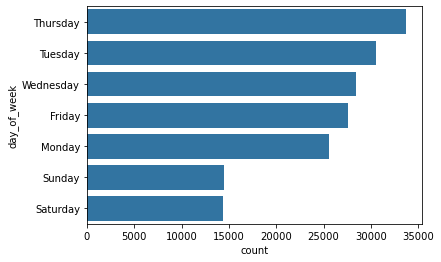

In [9]:
base_color = sb.color_palette()[0]
order = df['day_of_week'].value_counts().index
sb.countplot(data=df, y='day_of_week', color=base_color,order = order);

Thursday is the most day people take a trip

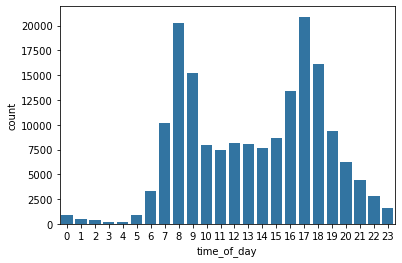

In [10]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='time_of_day', color=base_color );

This plot is multimod with picks at 17 and 8

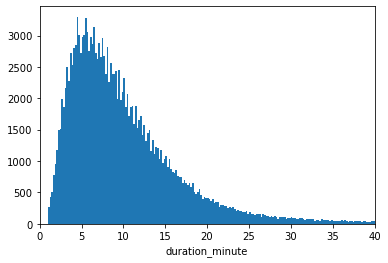

In [11]:
bins = np.arange(0,40 +0.2,0.2)
plt.hist(data = df, x = 'duration_minute',bins = bins);
plt.xlim(0,40)
plt.xlabel('duration_minute');

This plot is right skewed

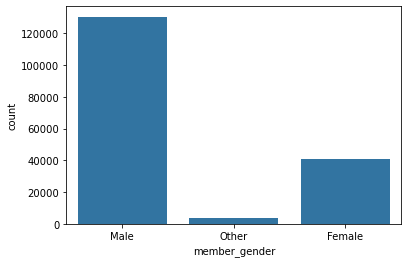

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=base_color );

male members are more than females

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For day of the week Thursday is the most day people take a trip and for distribution of time of the day is multimod with picks at 17 and 8.
don't need to do any transform.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
For duration_Sec divided it by 60 to convert it from sec to minute and rename it to be duration_minute, it is right skewed distribution


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

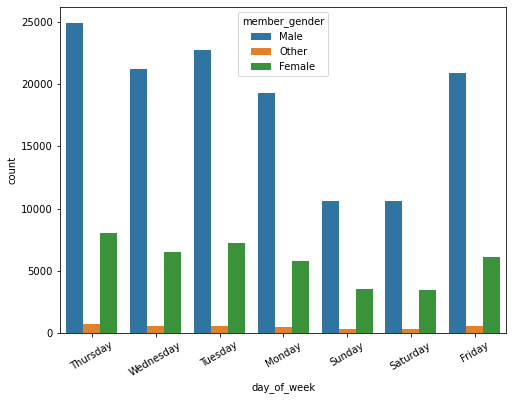

In [13]:
plt.figure(figsize = [8,6])
sb.countplot(data = df,x= 'day_of_week',hue='member_gender')
plt.xticks(rotation = 30);

All days of the week number of males take a trip more than females and others

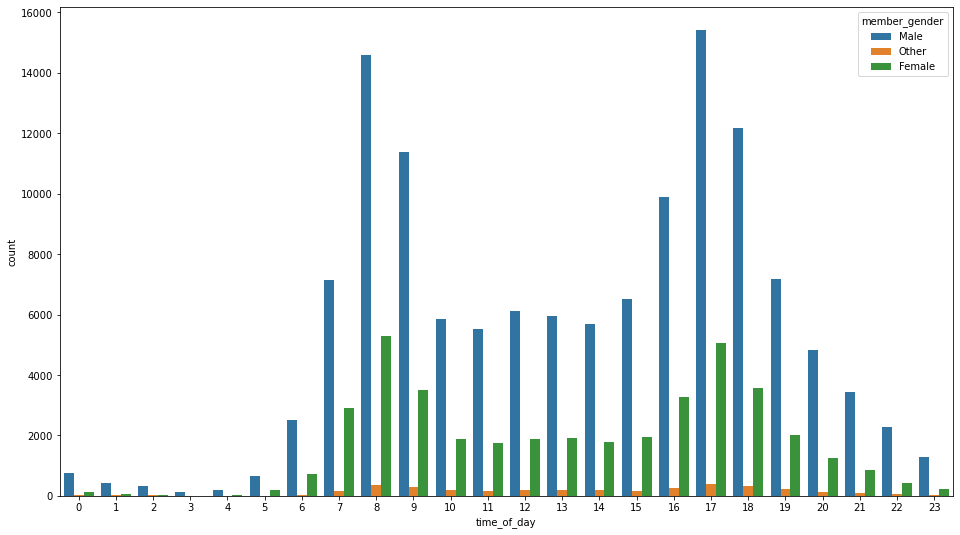

In [14]:
plt.figure(figsize = [16,9])
sb.countplot(data = df,x= 'time_of_day',hue='member_gender');

All time of the day number of males take a trip more than females and others

<AxesSubplot:xlabel='member_gender', ylabel='age'>

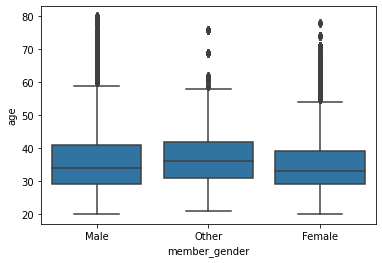

In [15]:
sb.boxplot(data=df, x='member_gender', y = 'age', color=base_color)

average age for others more than males and females who takes a trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

All days of the week number of males take a trip more than females and others and all time of the day number of males take a trip more than females and others


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

average age for others more than males and females who takes a trips

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

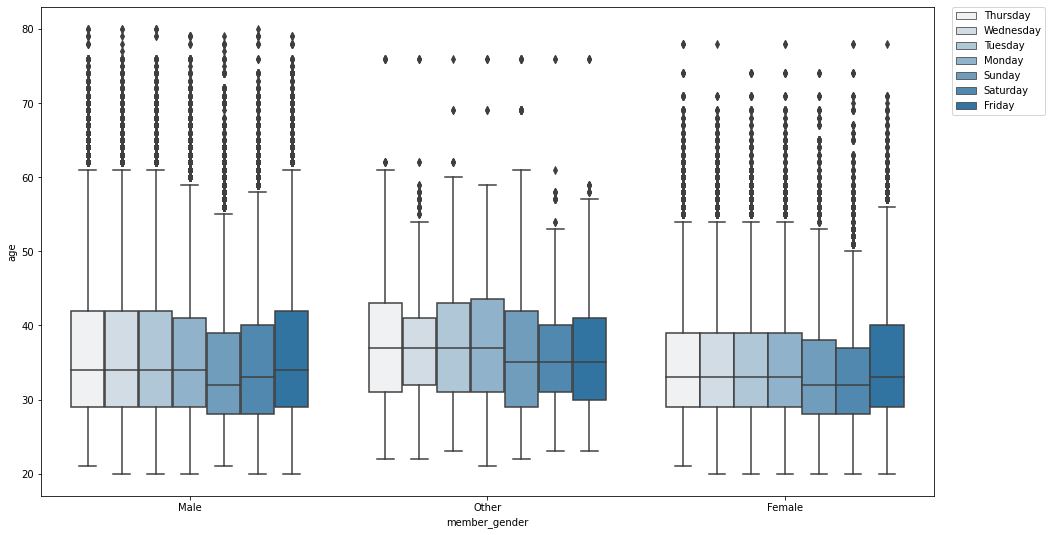

In [16]:
plt.figure(figsize = [16,9])
sb.boxplot(data=df, x='member_gender', y = 'age', color=base_color,hue = 'day_of_week')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

most of people who take trip between 29 years old and 41 years old.
average of ages who take trip at (Thursday,wednesday ,tuesday and monday) have same values

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

most of people who take trip between 29 years old and 41 years old.
average of ages who take trip at (Thursday,wednesday ,tuesday and monday) same values.

### Were there any interesting or surprising interactions between features?

nothing surprising.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!